# Introduction

Welcome to the data analysis project for Ice, a global online video game store. In this project, we will explore and analyze a comprehensive dataset containing user and expert reviews, genres, platforms (e.g., Xbox or PlayStation), historical data on game sales, and a crucial factor known as the Entertainment Software Rating Board (ESRB) ratings. Our primary objective is to identify valuable patterns and insights that can help determine the success factors behind video games.

As of December 2016, we stand at the brink of a new year, 2017, and our goal is to plan effective advertising campaigns that will maximize the potential for significant game releases. While we are using data from 2016, it's important to note that the techniques and insights gained from this project are transferable to other scenarios, whether it involves forecasting 2017 sales based on 2016 data or predicting sales for any other period.

The ESRB, or Entertainment Software Rating Board, plays a crucial role in evaluating the content of video games and assigning age ratings, such as "Teen" or "Mature." Understanding how these ratings impact a game's success will be one of the key aspects of our analysis.

Through this project, we aim to gain valuable experience in working with data and leverage our findings to make informed decisions that will lead to the identification of potential blockbuster games and the planning of effective advertising campaigns. So, let's dive into the world of video game data analysis and uncover the secrets behind their success.

# Set Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Data Loading

The `moved_games.csv` dataset comprises 16,715 entries (games) and 11 attributes or columns. The columns represent various facets of the games, including their name, platform, release year, genre, regional sales, reviews, and ESRB rating.

In [2]:
df = pd.read_csv("moved_games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 16715 rows and 11 columns.


# Data Preprocessing

To enhance readability and prevent potential case sensitivity issues, we convert all column names to lowercase.

In [4]:
df.columns = df.columns.str.lower()
print(list(df.columns))

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


To ensure data consistency and accuracy, our first step involves reviewing and adjusting the current data types of the columns in the dataset. The current data types have revealed a couple of noteworthy points:

- The `year_of_release` column is currently assigned the data type `float64` although it would be more fitting as an integer due to the nature of years as whole numbers. However, before we proceed with the conversion, it's crucial to address any missing values in this column, a task we'll undertake shortly.
- The `user_score` column is presently categorized as an `object` (string), suggesting that it may contain non-numeric values. To delve deeper into this matter, further investigation is warranted.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A close examination of the `user_score` column reveals the presence of a particular value labeled `tbd,` an abbreviation for "to be determined." This is the cause of the current `object` data type classification.

In [6]:
df["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

One potential solution is to treat `tbd` as a missing value (`NaN`), a logical step since it indicates that the user score remains undetermined. Once this transformation is executed, the conversion to a `float` data type can follow suit.

In [7]:
df["user_score"] = df["user_score"].replace("tbd", np.nan)
df["user_score"] = df["user_score"].astype(float)
df["user_score"].dtype

dtype('float64')

We've identified missing values in several columns: `name`, `genre`, and `year_of_release`, as well as `critic_score`, `user_score`, and `rating`.

In [9]:
pd.DataFrame(
    index=df.isnull().sum().index,
    data={
        "null": df.isnull().sum().values,
        "null_pct": df.isnull().sum().values / sum(df.isnull().sum().values) * 100
    }
).sort_values("null", ascending=False)

,null,null_pct
user_score,9125,36.880608
critic_score,8578,34.669792
rating,6766,27.346213
year_of_release,269,1.087220
name,2,0.008083
genre,2,0.008083
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Our approach to addressing these missing values depends on both the quantity of missing data and the nature of the columns.

- For the columns `name`, `genre`, and `year_of_release`, we observe a relatively small number of missing values. In these cases, it is appropriate to remove the rows with missing data. This approach helps us maintain data integrity without introducing substantial bias.
- On the other hand, the columns `critic_score`, `user_score`, and `rating` exhibit a significant number of missing values. Arbitrarily filling these gaps could lead to biased results, so we choose to retain the `NaN` values, signifying the unavailability of this information.

Potential reasons for missing values:

- `year_of_release`: Missing values may be attributed to games that are upcoming, where the release year has not been recorded or to instances where the recording of the year is incomplete.
- `critic_score`, `user_score`, and `rating`: Missing values in these columns might indicate that certain games have not been reviewed/rated or the necessary data may not have been collected for a variety of reasons.

In [10]:
df = df.dropna(subset=["name", "genre", "year_of_release"]).reset_index(drop=True)
df["year_of_release"] = df["year_of_release"].astype(int)

df[["name", "genre", "year_of_release"]].isnull().sum()

name               0
genre              0
year_of_release    0
dtype: int64

To gain a comprehensive view of a game's global sales, we will create a new column called `total_sales`. This column will aggregate the total sales from all regions, including North America, Europe, Japan, and other regions.

In [11]:
df["total_sales"] = df[df.columns[df.columns.str.contains("sales")]].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Data Analysis

To get a grasp on the gaming industry's evolution, we'll visualize the number of game releases spanning various years.

- **Initial Years (1980s - Early 1990s)**: The data indicates a modest number of game releases, corresponding to the industry's early stages.
- **Rapid Growth (Mid 1990s - 2000s)**: From the mid-1990s onward, there's a noticeable uptick in the number of game releases. This surge aligns with technological advancements and the introduction of new gaming platforms.
- **Peak and Decline (2000s - 2010s)**: The 2000s witnessed a steady rise in game releases, culminating in a peak around 2008-2009. Post this peak, there's a decline in the number of annual game releases. Factors like market saturation, a shift towards online gaming platforms, or longer game development cycles might contribute to this trend.

It's evident that the gaming industry has experienced dynamic shifts over the years with certain periods showcasing a burst of creativity and production.

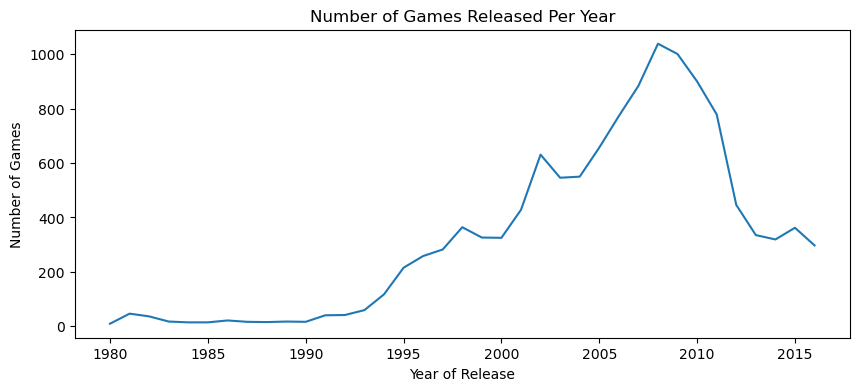

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(
    df.groupby("year_of_release")["name"].nunique().index,
    df.groupby("year_of_release")["name"].nunique().values
)
plt.title("Number of Games Released Per Year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.show()

The gaming industry is characterized by its diverse platforms, each competing for market share. To understand which platforms have historically dominated sales, we'll visualize the total sales for each platform.

- **Leading Platforms**: Platforms like PS2, X360, PS3, Wii, and DS emerge as the top contenders, each boasting sales figures in the hundreds of millions.
- **Mid-tier Platforms**: Following the leaders, we have platforms like PS, PS4, GBA, and PSP. These platforms have also performed commendably with significant sales figures.
- **Lesser-known Platforms**: The chart also highlights several platforms with lower sales figures, indicating their niche status or shorter market presence.

This visualization underscores the competitive nature of the gaming industry. While certain platforms have managed to carve a significant market share, others have faced challenges in maintaining sustained demand.

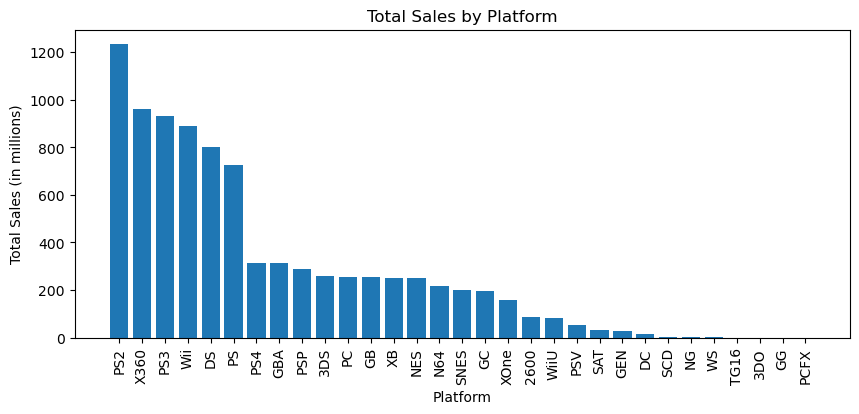

In [14]:
plt.figure(figsize=(10, 4))
plt.bar(
    df.groupby("platform").sum()["total_sales"].sort_values(ascending=False).index,
    df.groupby("platform").sum()["total_sales"].sort_values(ascending=False).values
)
plt.title("Total Sales by Platform")
plt.xlabel("Platform")
plt.xticks(rotation=90)
plt.ylabel("Total Sales (in millions)")
plt.show()

We'll focus on platforms with the highest total sales and plot a distribution based on data for each year. This will shed light on the rise and fall of platform popularity over time.

- **PS2**: The PlayStation 2, or PS2, witnessed a surge in sales in the early 2000s, sustaining its peak for a few years before experiencing a decline post-2005. This decline coincides with the release of newer platforms, such as the PS3.
- **X360**: The Xbox 360, abbreviated as X360, saw its sales soar around 2005. The platform maintained strong sales for nearly a decade, with a noticeable decline post-2015.
- **PS3**: The PlayStation 3, or PS3, followed a trajectory similar to the X360. It saw an upswing in sales around 2007, which continued for several years.
- **Wii**: Nintendo's Wii platform exhibited a sharp rise in sales post-2006, reaching its pinnacle around 2008-2009. After this peak, sales tapered off, echoing the lifecycle patterns observed in other platforms.
- **DS**: The Nintendo DS, or DS, displayed significant sales from 2005 through 2010. Post-2010, like other platforms in this group, its sales waned.

These trends illuminate the typical lifecycle of gaming platforms. Each platform experiences a phase of ascent, followed by a period of dominance, and eventually, a decline. This cyclical pattern is influenced by technological advancements, market competition, and the release of newer platforms.

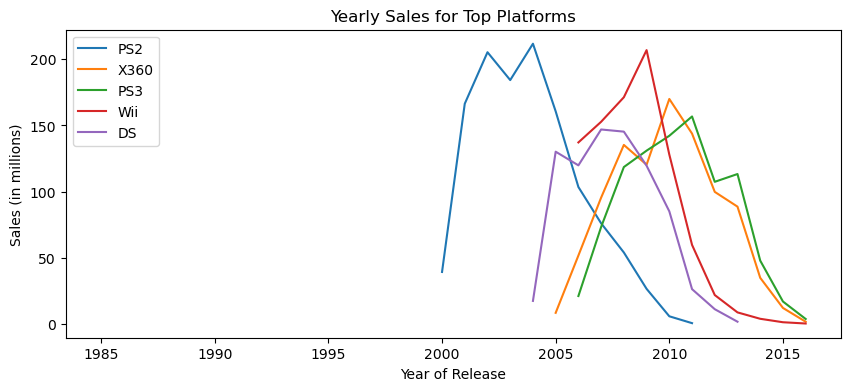

In [15]:
top_platforms = df.groupby("platform").sum()["total_sales"].sort_values(ascending=False).head(5)

top_platforms_data = df[df["platform"].isin(top_platforms.index)]

yearly_sales_top_platforms = top_platforms_data.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")

plt.figure(figsize=(10, 4))
for platform in top_platforms.index:
    plt.plot(yearly_sales_top_platforms[platform], label=platform)

plt.title("Yearly Sales for Top Platforms")
plt.xlabel("Year of Release")
plt.ylabel("Sales (in millions)")
plt.legend(loc="upper left")
plt.show()

We can also observe the lifespan of each platform. PC and DS, for instance, have had long lifespans of 31 and 28 years, respectively. In contrast, some lesser-known platforms like TG16, PCFX, and GG didn't last for more than a year. The average lifespan is approximately 7.61 years.

In [17]:
platform_first_year = df.groupby("platform")["year_of_release"].min()
platform_last_year = df.groupby("platform")["year_of_release"].max()

platform_duration = platform_last_year - platform_first_year

average_duration = platform_duration.mean()

print(average_duration)
pd.DataFrame(platform_duration.sort_values(ascending=False).reset_index())

7.612903225806452


,platform,year_of_release
0,PC,31
1,DS,28
2,GB,13
3,X360,11
4,PSP,11
5,PS2,11
6,NES,11
7,DC,10
8,Wii,10
9,PS3,10


To make a prognosis for 2017, let's shift our focus to more recent data. We'll concentrate on data from 2010 onwards from now on.

In [18]:
df_recent = df[df["year_of_release"] >= 2010]
df_recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


If we examine total sales by platform from 2010 onwards, we can see that it is dominated by the PS3 and Xbox 360, while the PS2 started to decline. This makes sense, as this period coincides with the peak of these two platforms.

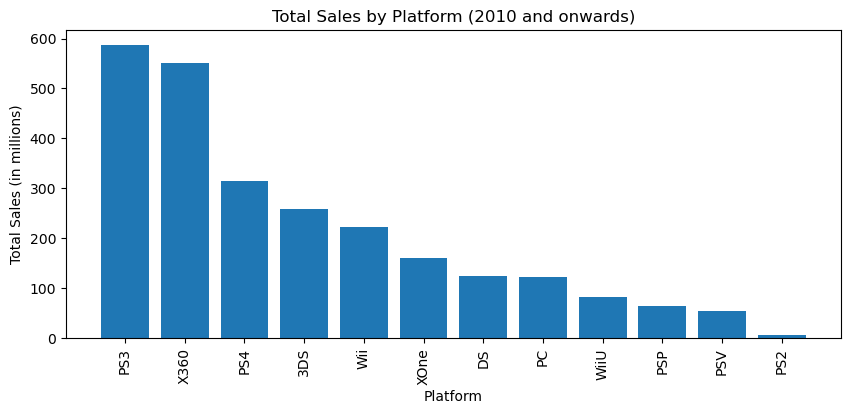

In [19]:
plt.figure(figsize=(10, 4))
plt.bar(
    df_recent.groupby("platform").sum()["total_sales"].sort_values(ascending=False).index,
    df_recent.groupby("platform").sum()["total_sales"].sort_values(ascending=False).values
)
plt.title("Total Sales by Platform (2010 and onwards)")
plt.xlabel("Platform")
plt.xticks(rotation=90)
plt.ylabel("Total Sales (in millions)")
plt.show()

We'll create box plots for global sales of all games, broken down by platform. Using box plots, we can observe various statistical measures, such as Q1 (first quartile), Q2 (median), and Q3 (third quartile). However, for better visualization, we will remove outliers in this part.

- **Median Sales**: Platforms like PS3, X360, and Wii have higher median sales compared to platforms like PC and PSP, indicating that the average game on these platforms tends to sell more.
- **Sales Spread**: Platforms like PS3, X360, and Wii have a wider distribution of sales, with several outliers suggesting that while many games achieve average sales, some games become massive hits.
- **Consistency**: The PC platform has a more consistent and narrow sales range, indicating less variability in game sales on this platform.

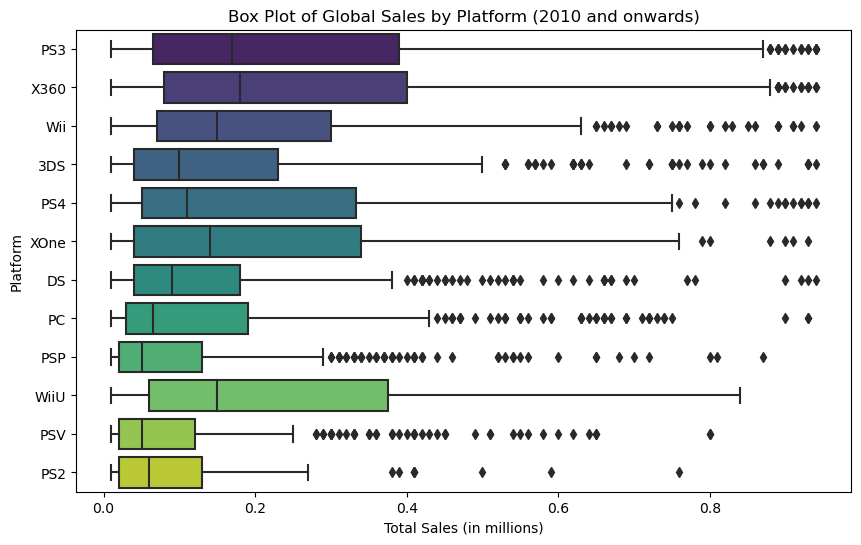

In [32]:
Q1 = df_recent["total_sales"].quantile(0.25)
Q3 = df_recent["total_sales"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_recent_iqr_filtered = df_recent[(df_recent["total_sales"] >= lower_bound) & (df_recent["total_sales"] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_recent_iqr_filtered, y="platform", x="total_sales", palette="viridis")
plt.title("Box Plot of Global Sales by Platform (2010 and onwards)")
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Platform")
plt.show()

We'll also examine the impact of user and professional reviews on sales for a popular platform, in this case, the PS3. The correlation between user reviews and sales is 0.17036608108079296, which is relatively small, suggesting a limited influence. On the other hand, the correlation with professional reviews is 0.45215906462621125, indicating a moderate influence. This implies that professional reviews have a more significant impact, which aligns with the common perception that professional reviews are typically more trusted.

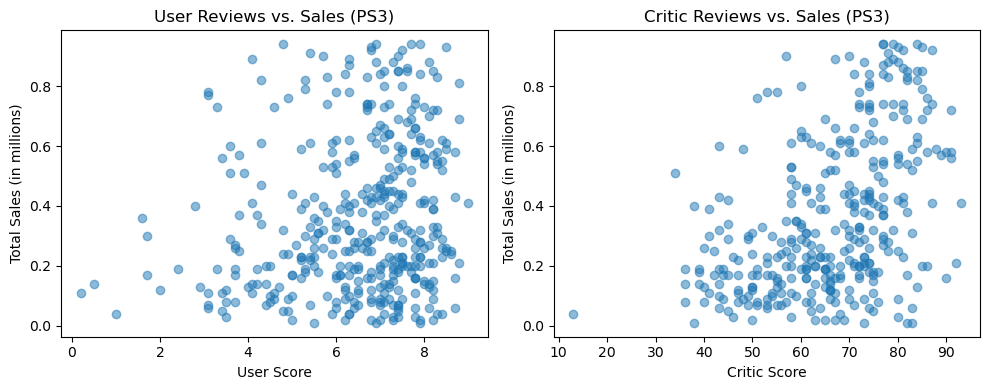

[0.17036608108079296, 0.45215906462621125]

In [34]:
df_ps3 = df_recent_iqr_filtered[df_recent_iqr_filtered["platform"] == "PS3"]

columns = ["user_score", "critic_score"]
titles = ["User Reviews vs. Sales (PS3)", "Critic Reviews vs. Sales (PS3)"]
xlabels = ["User Score", "Critic Score"]

correlations = []

plt.figure(figsize=(10, 4))

for index, column in enumerate(columns):
    plt.subplot(1, 2, index + 1)
    plt.scatter(df_ps3[column], df_ps3["total_sales"], alpha=0.5)
    plt.title(titles[index])
    plt.xlabel(xlabels[index])
    plt.ylabel("Total Sales (in millions)")
    
    # Calculate correlation and store it
    correlation = df_ps3[column].corr(df_ps3["total_sales"])
    correlations.append(correlation)

plt.tight_layout()
plt.show()

correlations

The table displays sales figures for popular games on the PS3 platform across different platforms. It's evident that sales on the PS3 are comparable to those on the Xbox 360, as these two platforms share similarities. In contrast, when compared to other platforms, the difference in sales is quite significant.

In [22]:
df_ps3 = df_recent[df_recent["platform"] == "PS3"]

top_ps3_games = df_ps3.nlargest(10, "total_sales")["name"].tolist()

popular_games_data = df_recent[df_recent["name"].isin(top_ps3_games)]

sales_by_platform = popular_games_data.pivot_table(index="name", columns="platform", values="total_sales", aggfunc="sum")
sales_by_platform.fillna(0) 

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,
Battlefield 3,0.00,0.00,2.78,0.00,7.17,0.00,0.00,0.00,0.00,0.00,7.32,0.00
Call of Duty: Black Ops,0.00,0.58,0.00,0.00,12.63,0.00,0.00,0.00,1.37,0.00,14.62,0.00
Call of Duty: Black Ops II,0.00,0.00,1.52,0.00,13.79,0.00,0.00,0.00,0.00,0.41,13.68,0.00
Call of Duty: Ghosts,0.00,0.00,0.69,0.00,9.36,3.83,0.00,0.00,0.00,0.35,10.24,2.92
Call of Duty: Modern Warfare 3,0.00,0.00,1.71,0.00,13.33,0.00,0.00,0.00,0.83,0.00,14.73,0.00
FIFA 12,0.39,0.00,0.47,0.08,6.64,0.00,0.52,0.00,0.76,0.00,4.17,0.00
FIFA Soccer 13,0.29,0.00,0.40,0.00,8.17,0.00,0.34,0.44,0.69,0.48,5.16,0.00
Gran Turismo 5,0.00,0.00,0.00,0.00,10.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand Theft Auto V,0.00,0.00,1.17,0.00,21.05,12.62,0.00,0.00,0.00,0.00,16.27,5.47


The bar chart illustrates the total sales and the number of games released by genre for games launched from 2010 onwards.

- Genres like Action, Sports, Shooter, and Role-Playing are both popular in terms of the number of releases and sales, making them the most profitable genres.
- On the other hand, despite having a decent number of releases, genres like Strategy and Adventure have relatively low sales, indicating they might not be as profitable or mainstream as the top genres.
- It's also worth noting that certain genres like Puzzle have low releases and sales, suggesting a niche market.

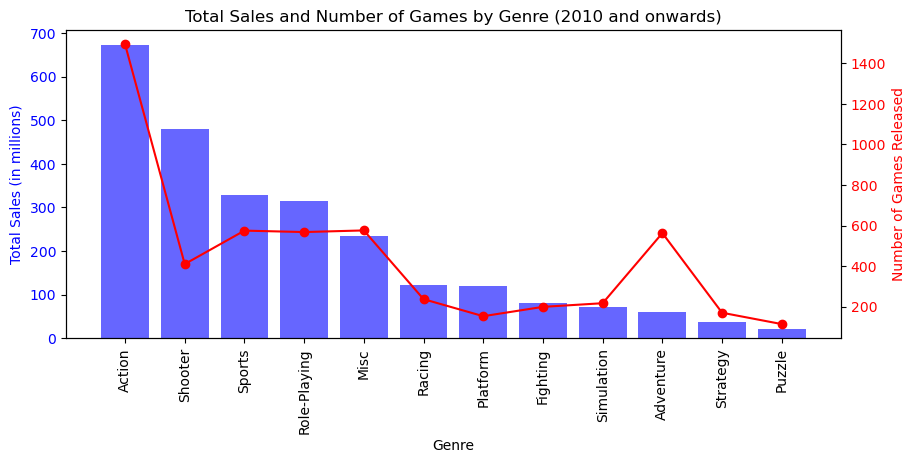

In [23]:
grouped_genre = df_recent.groupby("genre").agg({"total_sales": "sum", "name": "count"}).sort_values(by="total_sales", ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.bar(grouped_genre.index, grouped_genre["total_sales"], color="b", alpha=0.6, label="Total Sales")
ax1.set_xlabel("Genre")
ax1.set_ylabel("Total Sales (in millions)", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.set_title("Total Sales and Number of Games by Genre (2010 and onwards)")

ax2 = ax1.twinx()
ax2.plot(grouped_genre.index, grouped_genre["name"], color="r", marker="o", label="Number of Games Released")
ax2.set_ylabel("Number of Games Released", color="r")
ax2.tick_params(axis="y", labelcolor="r")

ax1.set_xticks(grouped_genre.index)
ax1.set_xticklabels(grouped_genre.index, rotation=90)

plt.show()

# User Profile for Each Region

We'll aggregate sales for each platform in the North American (NA), European (EU), and Japanese (JP) regions and identify the top five platforms in each region. We'll then describe variations in their market shares.

- The X360 platform dominates in North America, while it is second in Europe and doesn't even make the top 5 in Japan.
- The PS3 platform is consistently popular across all regions, ranking second in North America and first in Europe.
- The 3DS platform, while being among the top in North America and Japan, is not in the top 5 for Europe.
- Japan has a distinct preference for platforms like the PSP and 3DS, which don't appear in the top 5 for the other two regions.

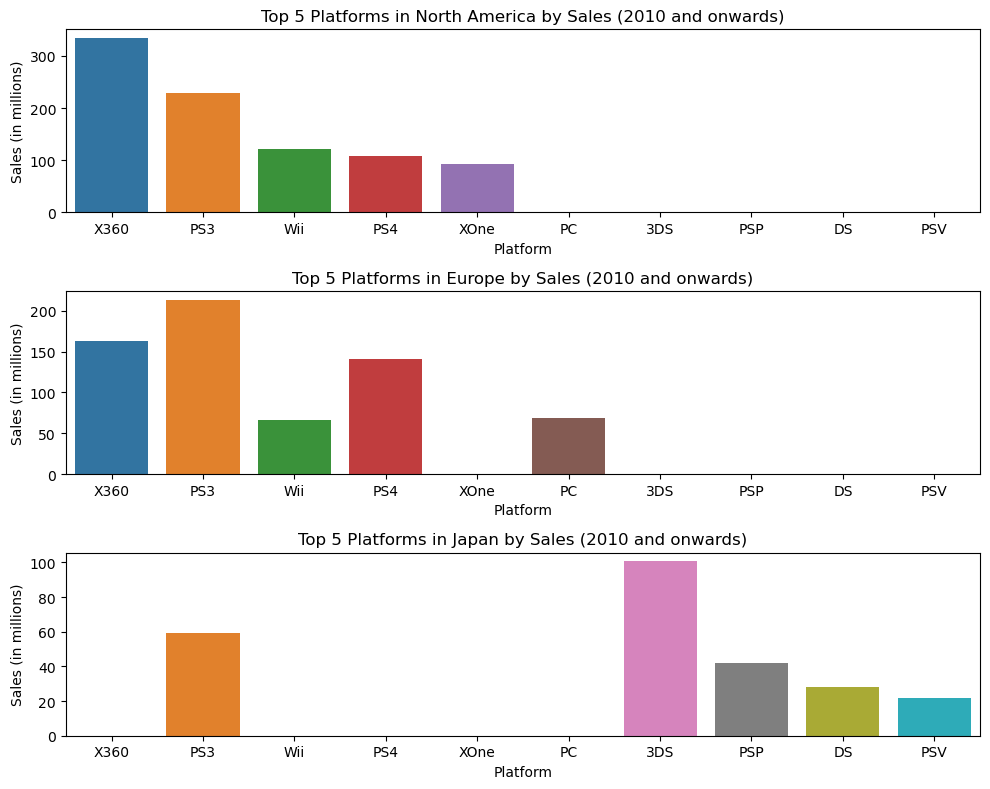

In [24]:
top_platforms_na = df_recent.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_recent.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_recent.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)

combined_platforms_df = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp], axis=1)
combined_platforms_df.columns = ["na_sales", "eu_sales", "jp_sales"]
combined_platforms_df = combined_platforms_df.reset_index().melt(
    id_vars="platform",
    value_vars=["na_sales", "eu_sales", "jp_sales"], 
    var_name="region",
    value_name="sales"
)

regions = ["na_sales", "eu_sales", "jp_sales"]
titles = ["Top 5 Platforms in North America by Sales", "Top 5 Platforms in Europe by Sales", "Top 5 Platforms in Japan by Sales"]

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for idx, (region, title) in enumerate(zip(regions, titles)):
    sns.barplot(data=combined_platforms_df[combined_platforms_df["region"] == region], x="platform", y="sales", ax=axes[idx])
    axes[idx].set_title(f"{title} (2010 and onwards)")
    axes[idx].set_ylabel("Sales (in millions)")
    axes[idx].set_xlabel("Platform")

plt.tight_layout()
plt.show()

Similar to platforms, we'll aggregate sales for each genre in the NA, EU, and JP regions and identify the top five genres in each region. We'll then explain the differences in genre popularity across regions.

- While the Action genre is popular across all regions, its sales in North America are significantly higher compared to Europe and Japan.
- Role-Playing games are the most popular in Japan, reflecting a distinct cultural preference, but they don't appear in the top 5 for North America or Europe.
- The Shooter genre, which is second in both North America and Europe, doesn't make the top 5 in Japan.

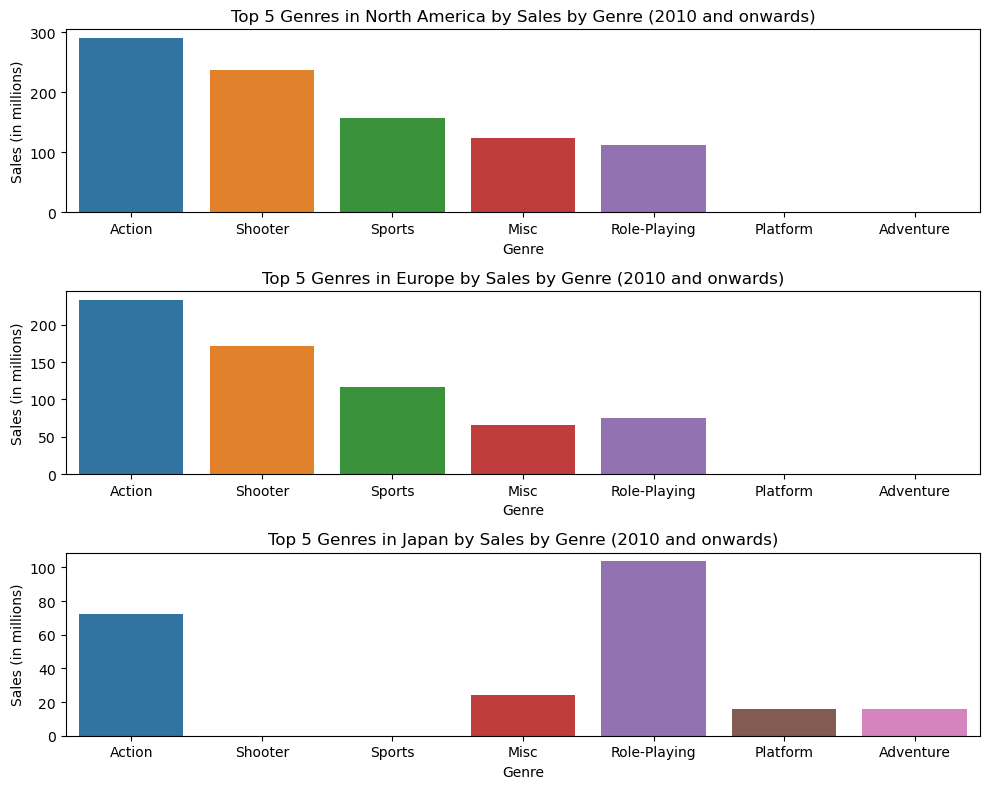

In [35]:
top_genres_na = df_recent[df_recent['year_of_release'] >= 2010].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_recent[df_recent['year_of_release'] >= 2010].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_recent[df_recent['year_of_release'] >= 2010].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

combined_genres_df = pd.concat([top_genres_na, top_genres_eu, top_genres_jp], axis=1)
combined_genres_df.columns = ["na_sales", "eu_sales", "jp_sales"]
combined_genres_df = combined_genres_df.reset_index().melt(
    id_vars="genre",
    value_vars=["na_sales", "eu_sales", "jp_sales"], 
    var_name="region",
    value_name="sales"
)

regions = ["na_sales", "eu_sales", "jp_sales"]
titles = ["Top 5 Genres in North America by Sales", "Top 5 Genres in Europe by Sales", "Top 5 Genres in Japan by Sales"]

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for idx, (region, title) in enumerate(zip(regions, titles)):
    sns.barplot(data=combined_genres_df[combined_genres_df["region"] == region], x="genre", y="sales", ax=axes[idx])
    axes[idx].set_title(f"{title} by Genre (2010 and onwards)")
    axes[idx].set_ylabel("Sales (in millions)")
    axes[idx].set_xlabel("Genre")

plt.tight_layout()
plt.show()

The ANOVA (Analysis of Variance) test is used to compare the means of more than two groups. In this context, it can help us determine if there's a statistically significant difference in the average sales of games across the different ESRB ratings.

- **Null Hypothesis**: There is no difference in the average sales across the ESRB ratings.
- **Alternative Hypothesis**: There is a difference in the average sales across the ESRB ratings.

We'll conduct the ANOVA test separately for each region: North America (NA), Europe (EU), and Japan (JP).

From the data, we can observe that some ratings, such as 'EC' and 'RP', have very few games associated with them and very minimal sales. Including such ratings with limited data can lead to issues when conducting statistical tests like ANOVA. A pragmatic approach would be to conduct the ANOVA test only for the major ratings ('E', 'T', 'M', 'E10+'), as these ratings have a substantial number of games and significant sales.

For all three regions, the p-values are significantly lower than the commonly used significance level of 0.05. This means we can reject the null hypothesis and conclude that there is a statistically significant difference in the average sales across the major ESRB ratings in each region.

In simpler terms, the ESRB rating does appear to have an effect on sales in all three regions, based on games released from 2010 onwards.

In [26]:
major_ratings = ["E", "T", "M", "E10+"]

f_stat_na, p_value_na = stats.f_oneway(*[df_recent["na_sales"][df_recent["rating"] == rating] for rating in major_ratings])
f_stat_eu, p_value_eu = stats.f_oneway(*[df_recent["eu_sales"][df_recent["rating"] == rating] for rating in major_ratings])
f_stat_jp, p_value_jp = stats.f_oneway(*[df_recent["jp_sales"][df_recent["rating"] == rating] for rating in major_ratings])

pd.DataFrame({
    "Region": ["North America", "Europe", "Japan"],
    "F-statistic": [f_stat_na, f_stat_eu, f_stat_jp],
    "P-value": [p_value_na, p_value_eu, p_value_jp]
})

,Region,F-statistic,P-value
0,North America,31.854992,2.828443e-20
1,Europe,38.627921,1.676692e-24
2,Japan,4.158457,5.983794e-03


# Hypothetical Testing

The t-test is used to determine if there is a significant difference between the means of two unrelated groups.

**Hypothesis 1**
- **Null Hypothesis**: The average user ratings for the Xbox One and PC platforms are equal.
- **Alternative Hypothesis**: The average user ratings for the Xbox One and PC platforms are different.

Since the p-value is much greater than our significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no significant difference between the average user ratings of the Xbox One and PC platforms.

Why **0.05**? We choose a significance level of 0.05 because it's a widely accepted standard. This means that if there's less than a 5% chance of getting our results just by random luck, we consider our results significant. It's like being willing to accept a small risk of being wrong to make a decision.

**Hypothesis 2**
- **Null Hypothesis**: The average user ratings for the Action and Sports genres are equal.
- **Alternative Hypothesis**: The average user ratings for the Action and Sports genres are different.

Since the p-value is much smaller than our significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant difference between the average user ratings for the Action and Sports genres.

In conclusion:
- The average user ratings for the Xbox One and PC platforms are not significantly different.
- The average user ratings for the Action and Sports genres are significantly different.

In [27]:
xbox_one_ratings_cleaned = df_recent[(df_recent["platform"] == "XOne") & (df_recent["user_score"].notna())]["user_score"]
pc_ratings_cleaned = df_recent[(df_recent["platform"] == "PC") & (df_recent["user_score"].notna())]["user_score"]

t_stat_platforms_cleaned, p_value_platforms_cleaned = stats.ttest_ind(xbox_one_ratings_cleaned, pc_ratings_cleaned, equal_var=False)

action_ratings_cleaned = df_recent[(df_recent["genre"] == "Action") & (df_recent["user_score"].notna())]["user_score"]
sports_ratings_cleaned = df_recent[(df_recent["genre"] == "Sports") & (df_recent["user_score"].notna())]["user_score"]

t_stat_genres_cleaned, p_value_genres_cleaned = stats.ttest_ind(action_ratings_cleaned, sports_ratings_cleaned, equal_var=False)

pd.DataFrame({
    "Hypothesis": [
        "Average user ratings of Xbox One vs PC",
        "Average user ratings of Action vs Sports genres"
    ],
    "Test statistic": [t_stat_platforms_cleaned, t_stat_genres_cleaned],
    "P-value": [p_value_platforms_cleaned, p_value_genres_cleaned]
})

,Hypothesis,Test statistic,P-value
0,Average user ratings of Xbox One vs PC,0.024880,9.801634e-01
1,Average user ratings of Action vs Sports genres,8.253197,1.451615e-15


# Conclusion

The analysis of Ice, an online video game store, offers insights into the video game market dynamics up to December 2016. From the data:

- **Platform Relevance**: Platforms have a lifecycle of roughly 7.6 years, but some, like PC, remain relevant much longer.
- **Sales Trends**: More recent data (after 2010) indicates platforms like PS3, X360, and PS4 are major players in terms of sales. Additionally, Action, Shooter, and Sports genres dominate in popularity and profitability.
- **Regional Preferences**: Different regions have distinct platform and genre preferences. For instance, North America and Europe's sales patterns differ from those in Japan.
- **User and Critic Influence**: Both user and critic reviews influence game sales, with critic scores having a slightly stronger correlation with sales.
- **Rating Impact**: ESRB ratings might play a role in a game's sales, especially in North America and Europe.

In planning for 2017, understanding these patterns and preferences is pivotal. For targeted advertising and market strategies, considering regional preferences, platform trends, genre popularity, and the potential influence of reviews and ratings is crucial.